In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel(r'/home/sinbad/Desktop/DATASET.xlsx')

In [3]:
df.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,October,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,February,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,February,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),March,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,August,2023,NaN


In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
df.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,10,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,2,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,2,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),3,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,8,2023,NaN


In [5]:
df['Timeline'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str),format='%Y-%m')
df = df.drop(['Month','Year'],axis=1)
df = df.sort_values(by='Timeline').reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Pharmacy Name  450 non-null    object        
 1   Product Code   450 non-null    object        
 2   Product Name   450 non-null    object        
 3   Sales          351 non-null    float64       
 4   Timeline       450 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 17.7+ KB


In [7]:
df

,Pharmacy Name,Product Code,Product Name,Sales,Timeline
0,Kigamboni Pharmacy,10010108AC,CONDOMS,NaN,2023-01-01
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-01-01
...,...,...,...,...,...
445,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,774606.000000,2024-06-01
446,TEMEKE PHARMACY,40030134AC,Copper T IUD,NaN,2024-06-01
447,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2024-06-01
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,26.000000,2024-06-01


In [8]:
df

,Pharmacy Name,Product Code,Product Name,Sales,Timeline
0,Kigamboni Pharmacy,10010108AC,CONDOMS,NaN,2023-01-01
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-01-01
...,...,...,...,...,...
445,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,774606.000000,2024-06-01
446,TEMEKE PHARMACY,40030134AC,Copper T IUD,NaN,2024-06-01
447,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2024-06-01
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,26.000000,2024-06-01


In [9]:
df

,Pharmacy Name,Product Code,Product Name,Sales,Timeline
0,Kigamboni Pharmacy,10010108AC,CONDOMS,NaN,2023-01-01
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-01-01
...,...,...,...,...,...
445,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,774606.000000,2024-06-01
446,TEMEKE PHARMACY,40030134AC,Copper T IUD,NaN,2024-06-01
447,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2024-06-01
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,26.000000,2024-06-01


In [10]:
df2 = df.groupby(['Timeline'])['Sales'].sum().reset_index()

In [11]:
df2.head(30)

,Timeline,Sales
0,2023-01-01,8.561905e+06
1,2023-02-01,8.898086e+06
2,2023-03-01,7.675084e+06
3,2023-04-01,1.579313e+07
4,2023-05-01,9.011804e+06
5,2023-06-01,1.238357e+07
6,2023-07-01,8.305478e+06
7,2023-08-01,9.128949e+06
8,2023-09-01,7.579946e+06
9,2023-10-01,8.389505e+06


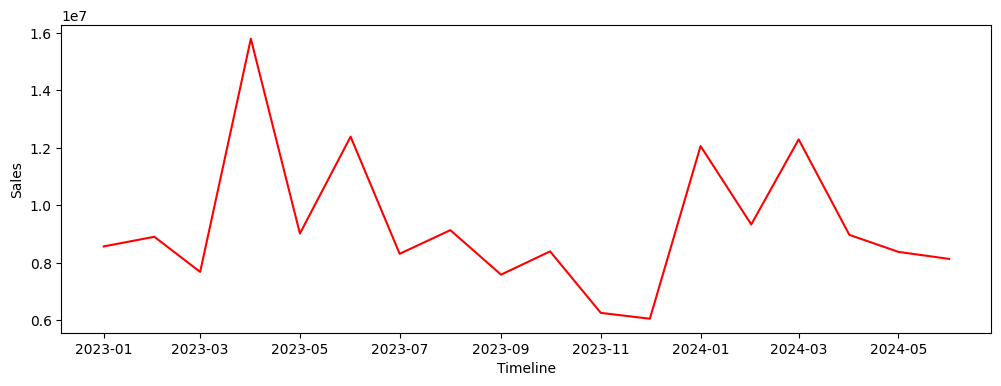

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.lineplot(x='Timeline', y='Sales', data = df2, color = 'red')
plt.show()

<Figure size 2000x1000 with 0 Axes>

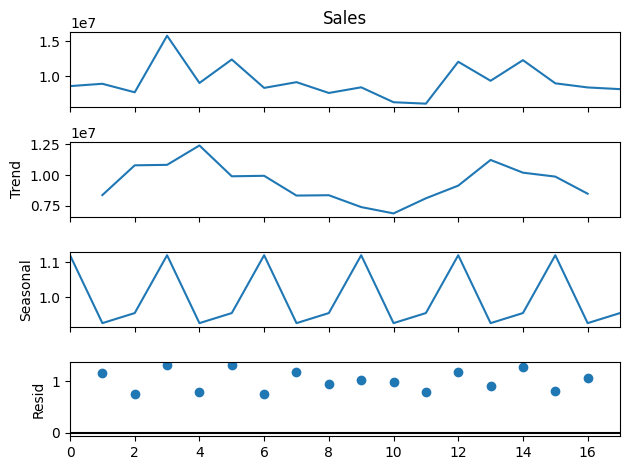

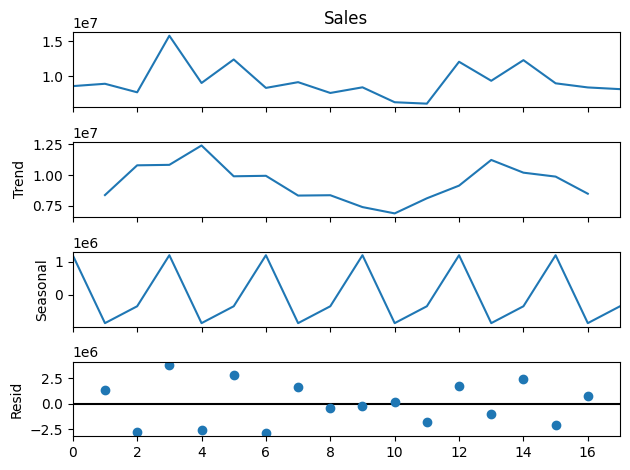

In [13]:
# decompositions
from statsmodels.tsa.seasonal import seasonal_decompose 
multplicative = seasonal_decompose(df2['Sales'], model = 'multiplicative', period=3)
additive = seasonal_decompose(df2['Sales'], model='additive', period = 3)

plt.figure(figsize=(20,10))
multplicative.plot()
additive.plot()
plt.show()

<Axes: xlabel='Timeline', ylabel='Sales'>

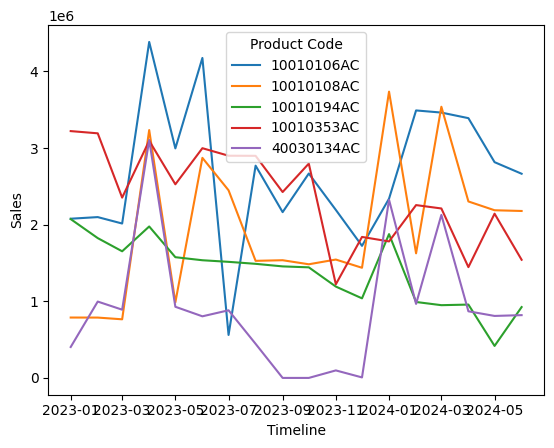

In [14]:
sales_trend = df.groupby(['Timeline','Product Code'])['Sales'].sum().reset_index()
sns.lineplot(y='Sales',x='Timeline',hue='Product Code', data=sales_trend)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

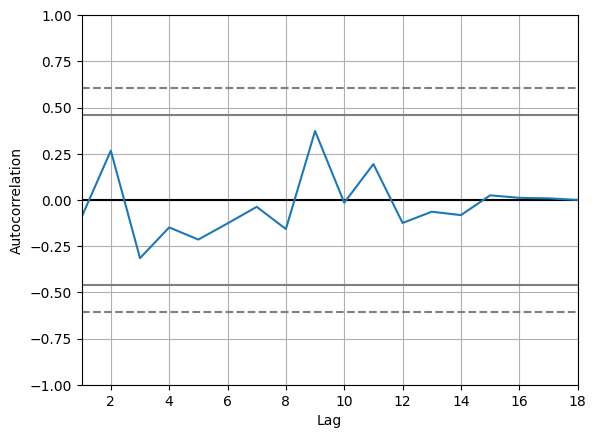

In [15]:
#test sseasonality
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Sales'].to_list())

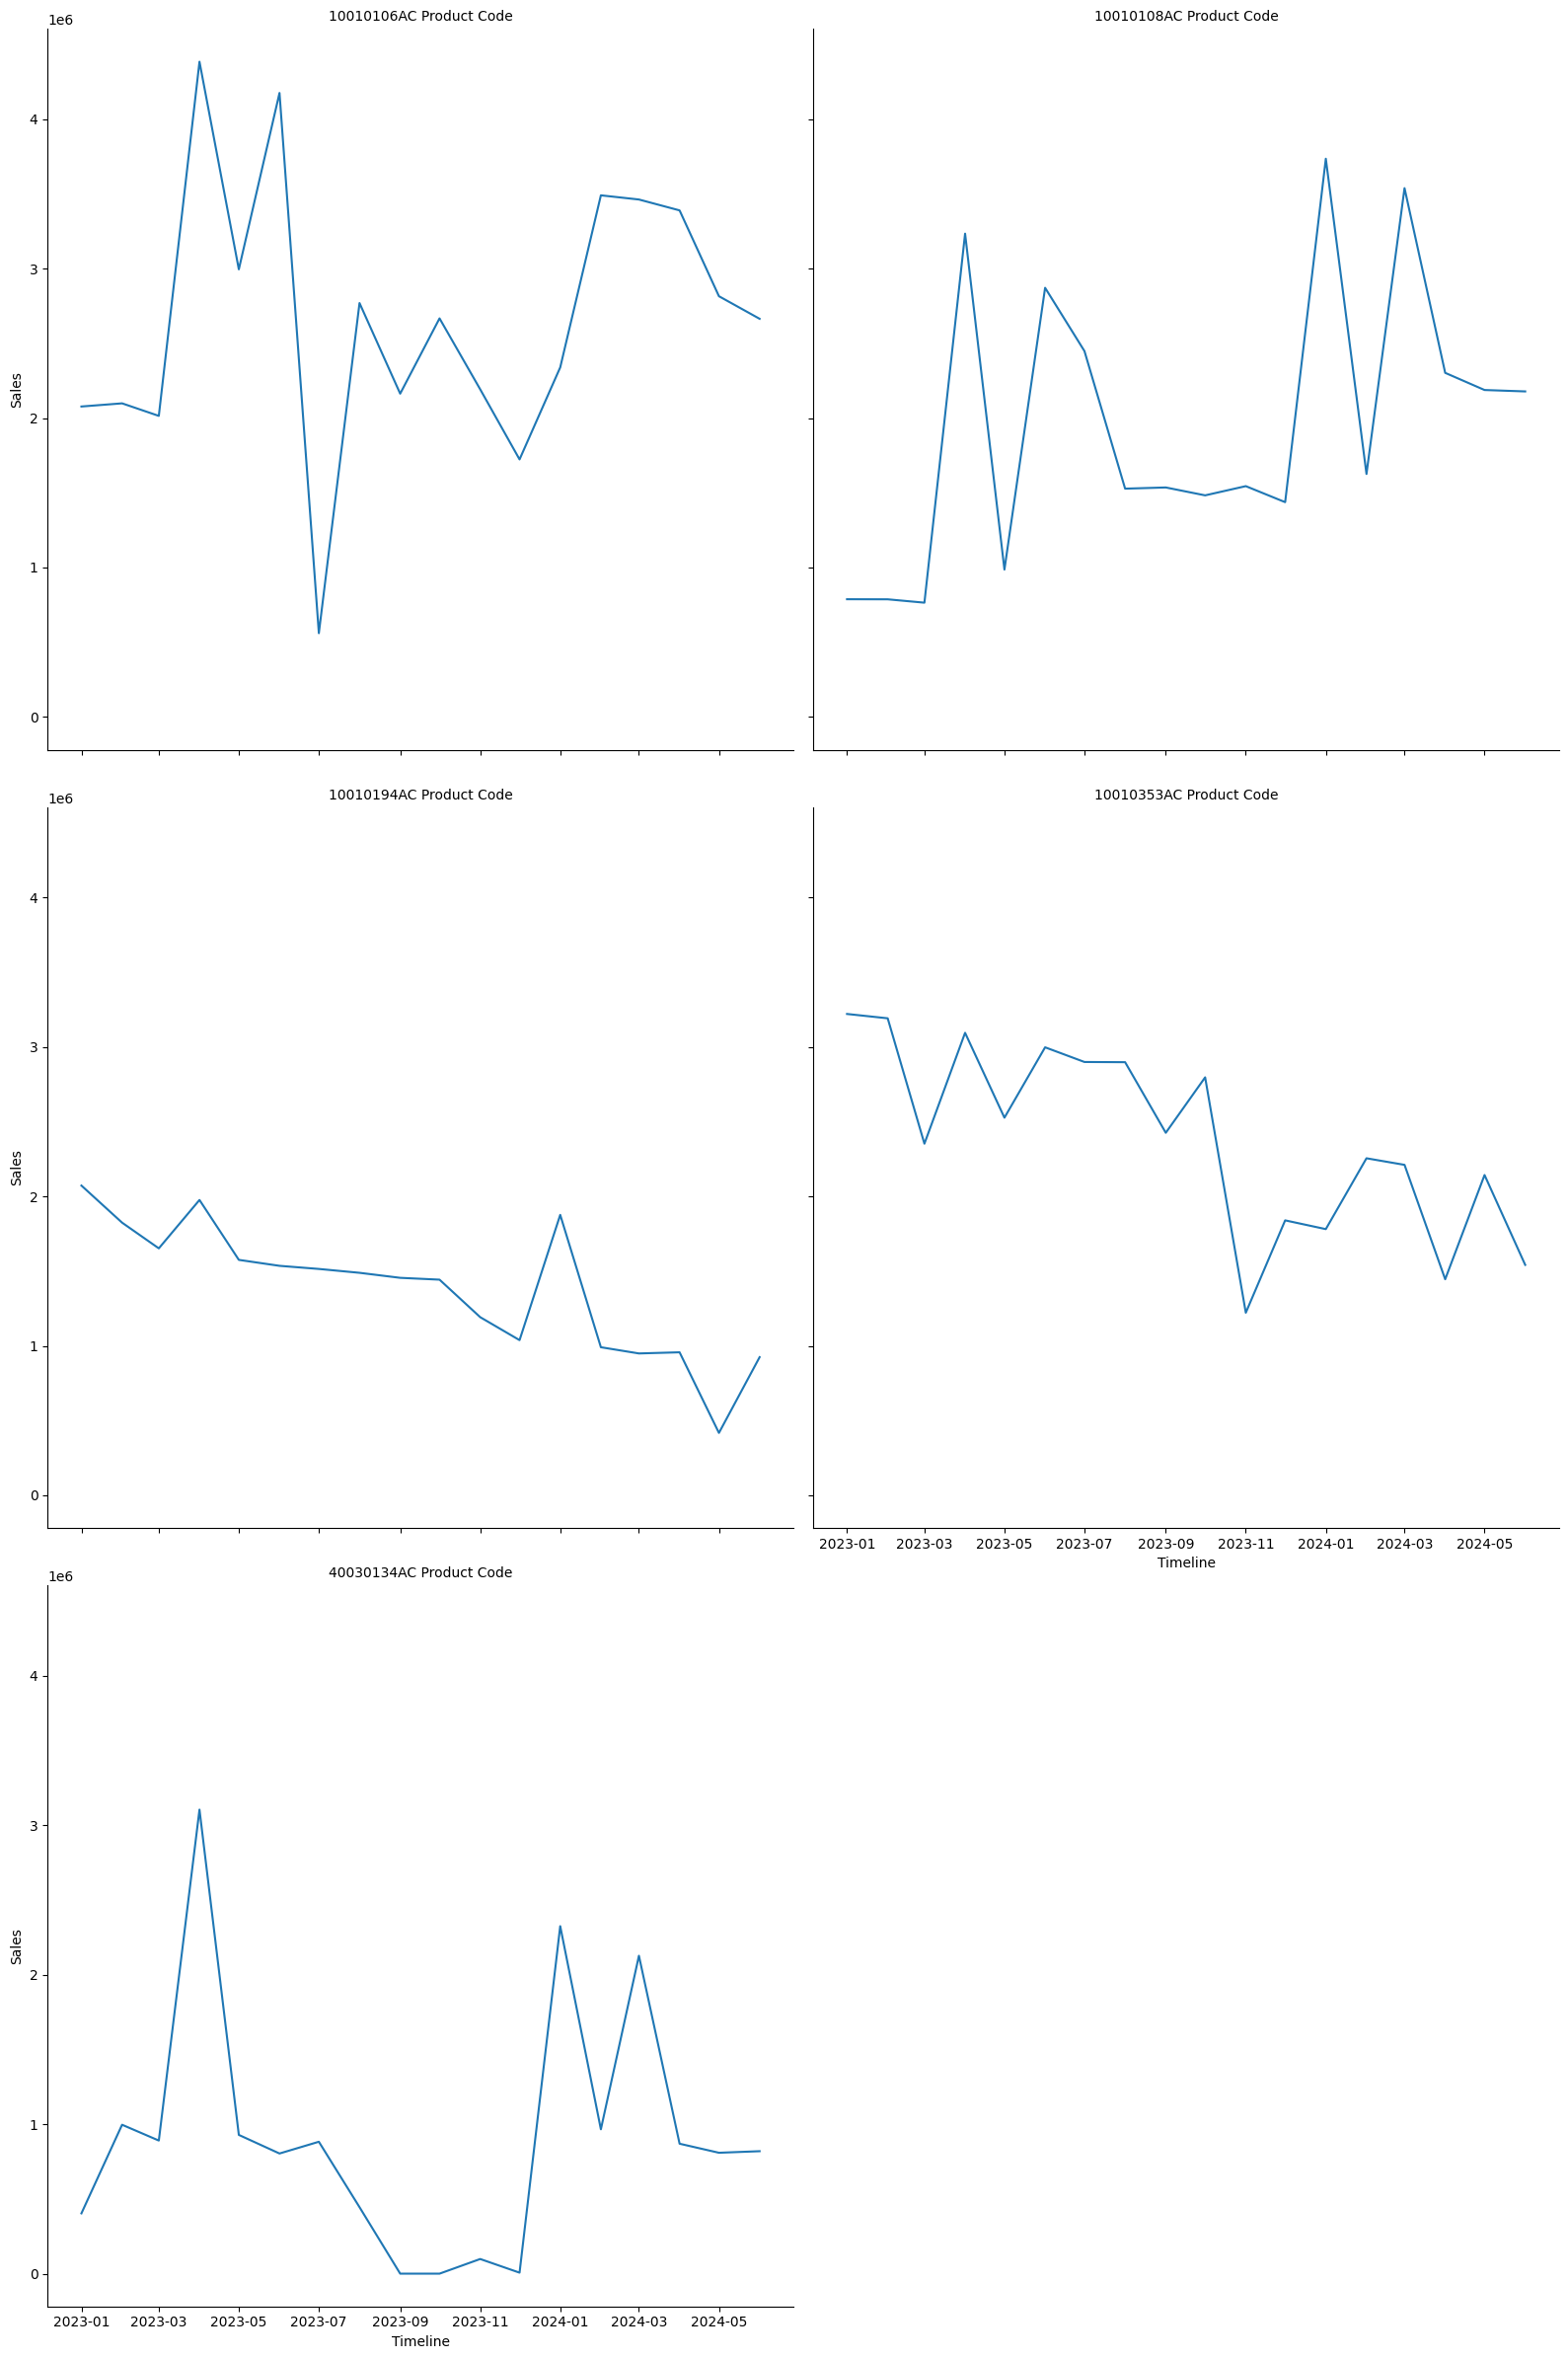

In [16]:
g = sns.FacetGrid(sales_trend, col='Product Code', col_wrap=2, height=8)

# Map the lineplot onto the grid
g.map(sns.lineplot, 'Timeline', 'Sales')

# Adjust the titles and layout
g.set_titles(col_template="{col_name} Product Code")
g.set_axis_labels("Timeline", "Sales")
g.fig.tight_layout()

# Show the plot
plt.show()

In [17]:
df.isna().sum()
df.dropna().reset_index()
df

,Pharmacy Name,Product Code,Product Name,Sales,Timeline
0,Kigamboni Pharmacy,10010108AC,CONDOMS,NaN,2023-01-01
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-01-01
...,...,...,...,...,...
445,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,774606.000000,2024-06-01
446,TEMEKE PHARMACY,40030134AC,Copper T IUD,NaN,2024-06-01
447,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2024-06-01
448,Kigamboni Pharmacy,40030134AC,Copper T IUD,26.000000,2024-06-01


In [18]:
# Check for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -3.54528939198883
p-value: 0.006897356978754133
Critical Values:
1%: -4.331573
5%: -3.23295
10%: -2.7487


datas are stationary since the p value is<0.05

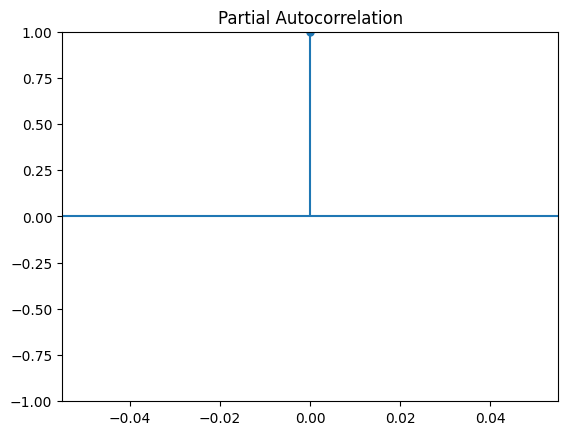

In [19]:
# how to obtain p value in arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df.Sales.diff(), lags=3)

plt.show()

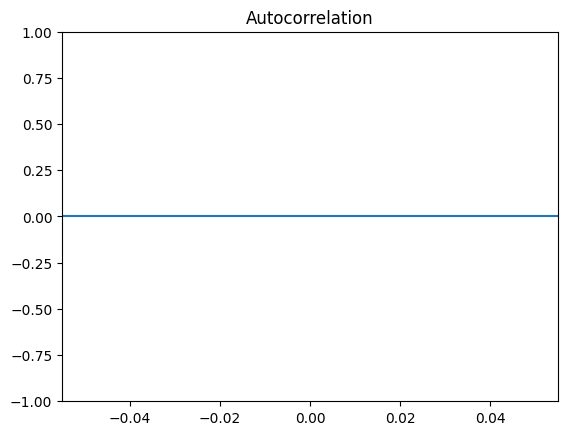

In [20]:
plot_acf(df.Sales.diff(), lags=3)

plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df2.Sales, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   18
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -290.543
Date:                Thu, 18 Jul 2024   AIC                            589.085
Time:                        23:35:38   BIC                            592.647
Sample:                             0   HQIC                           589.576
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.287e+06   5.08e+05     18.298      0.000    8.29e+06    1.03e+07
ar.L1         -0.7719      0.405     -1.907      0.057      -1.565       0.022
ma.L1          0.6180      0.622      0.994      0.3

/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


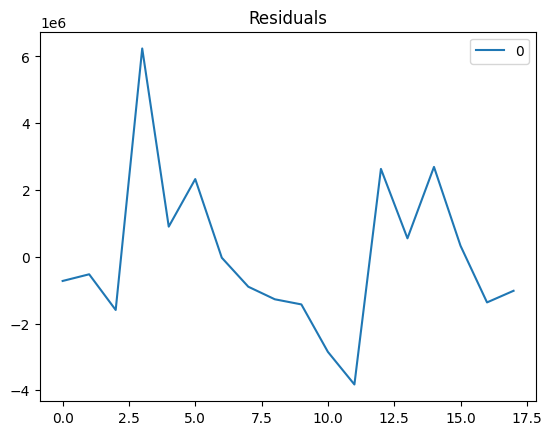

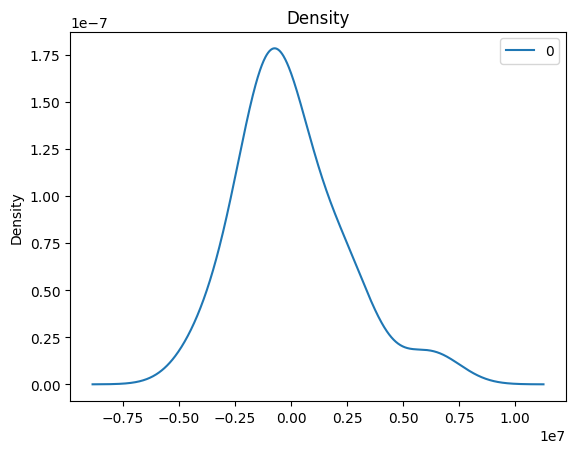

In [22]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.show()

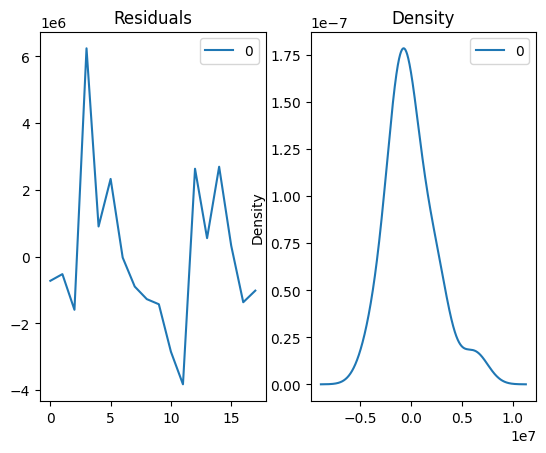

In [23]:


# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



In [26]:
train = df2.Sales[:85]
test = df2.Sales[85:]

In [29]:

import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
fitted = model.fit()


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=552.238, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=539.838, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=538.977, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=550.354, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=534.462, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=532.980, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=537.357, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=1.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=537.186, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.58 sec

Best mode

TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

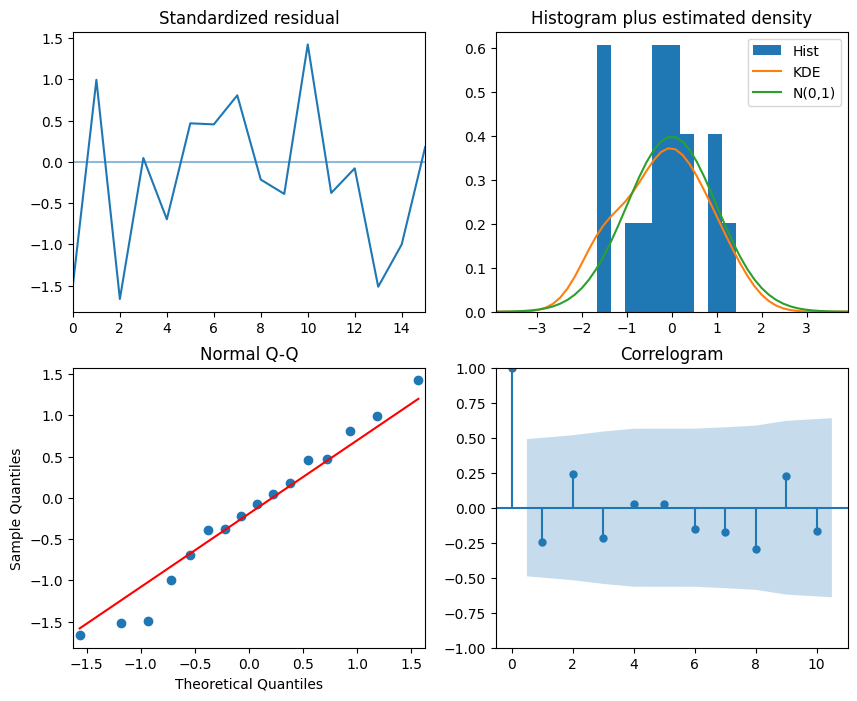

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [28]:
fitted = model.fit()

TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [ ]:
future_steps = 6
forecast = model.get_forecast(steps=future_steps, alpha = 0.05) #95 conf

forecast_index = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='M')[1:]

forecast_series = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecasts and confidence intervals to numpy arrays
forecast_series = forecast_series.to_numpy()
forecast_conf_int = forecast_conf_int.to_numpy()

LowerCI = forecast_conf_int[:, 0]
UpperCI = forecast_conf_int[:, 1]

AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [ ]:
start = len(train)
end = start + len(test) - 1


predictions = model.predict(start=start, end=end, dynamic=False)

In [ ]:
predictions

18    4.021446e+06
19    4.657125e+05
20   -3.090021e+06
21   -6.645755e+06
22   -1.020149e+07
23   -1.375722e+07
24   -1.731296e+07
25   -2.086869e+07
26   -2.442443e+07
27   -2.798016e+07
dtype: float64

In [ ]:
actual_values = [test]  
forecast_series = [predictions]  

# Ensure both series are of the same length
min_length = min(len(actual_values), len(forecast_series))
actual_values_trimmed = actual_values[:min_length]
forecast_series_trimmed = forecast_series[:min_length]

# Calculate Mean Squared Error
mse = mean_squared_error(actual_values_trimmed, forecast_series_trimmed)
print(f'Mean Squared Error (MSE): {mse}')

ValueError: Input contains NaN.